In [315]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [221]:
#importing the data
dataset=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [222]:
#Fetching  first 25 records 
dataset.head(25)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [223]:
#shape of the dataset
dataset.shape

(4340, 8)

In [224]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [225]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [226]:
dataset.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [227]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [228]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [229]:
print(dataset['year'].value_counts())
print(dataset['km_driven'].value_counts())
print(dataset['fuel'].value_counts())
print(dataset['seller_type'].value_counts())
print(dataset['transmission'].value_counts())
print(dataset['owner'].value_counts())
print(dataset['selling_price'].value_counts())

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64
70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: km_driven, Length: 770, dtype: int64
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int

In [230]:
from sklearn import preprocessing
dataset=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [231]:
year=dataset['year']
km_driven=dataset['km_driven']
seller_type = dataset['seller_type']
transmission_type = dataset['transmission']
owner=dataset['owner']
fuel=dataset['fuel']
selling_price=dataset['selling_price']


In [232]:
from matplotlib import style

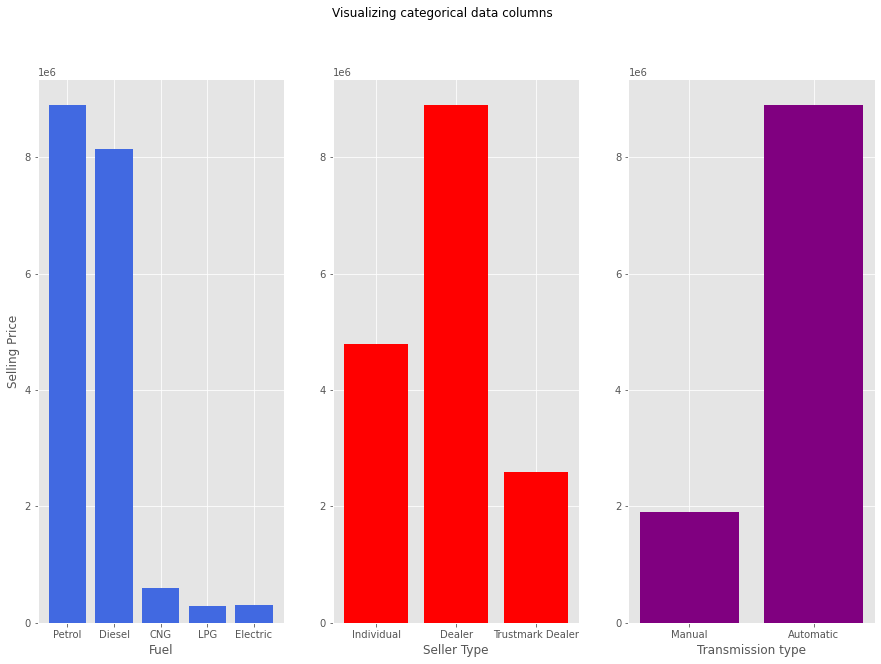

In [233]:
style.use('ggplot')
fig = plt.figure(figsize=(15,10))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel,selling_price, color='royalblue')
plt.xlabel("Fuel")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

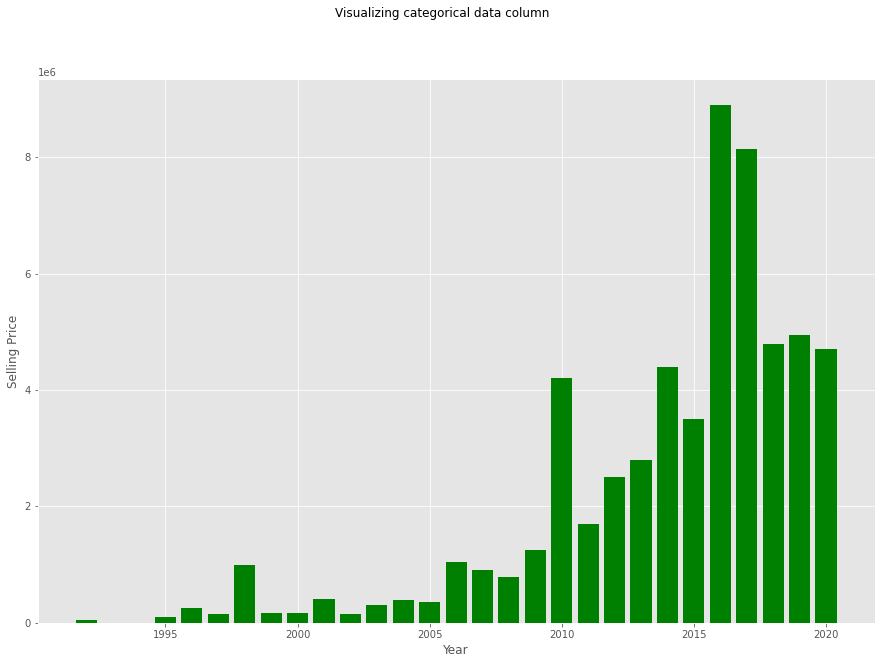

In [234]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Visualizing categorical data column')
plt.subplot(1,1,1)
plt.bar(year,selling_price, color='green')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

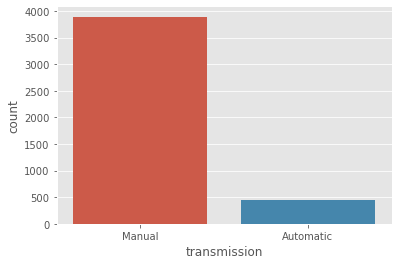

In [235]:
gear=dataset['transmission']
sns.countplot(gear)

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='count'>

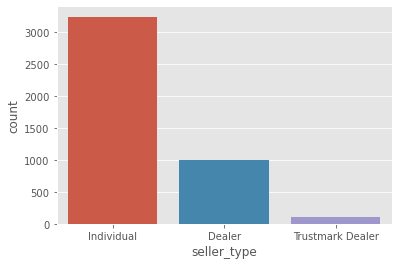

In [236]:
authority=dataset['seller_type']
sns.countplot(authority)

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='count'>

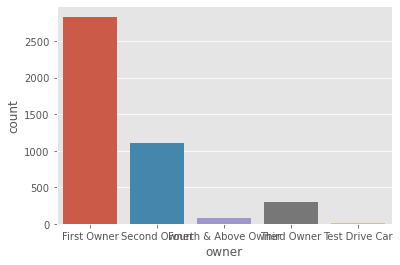

In [237]:
owned=dataset['owner']
sns.countplot(owned)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

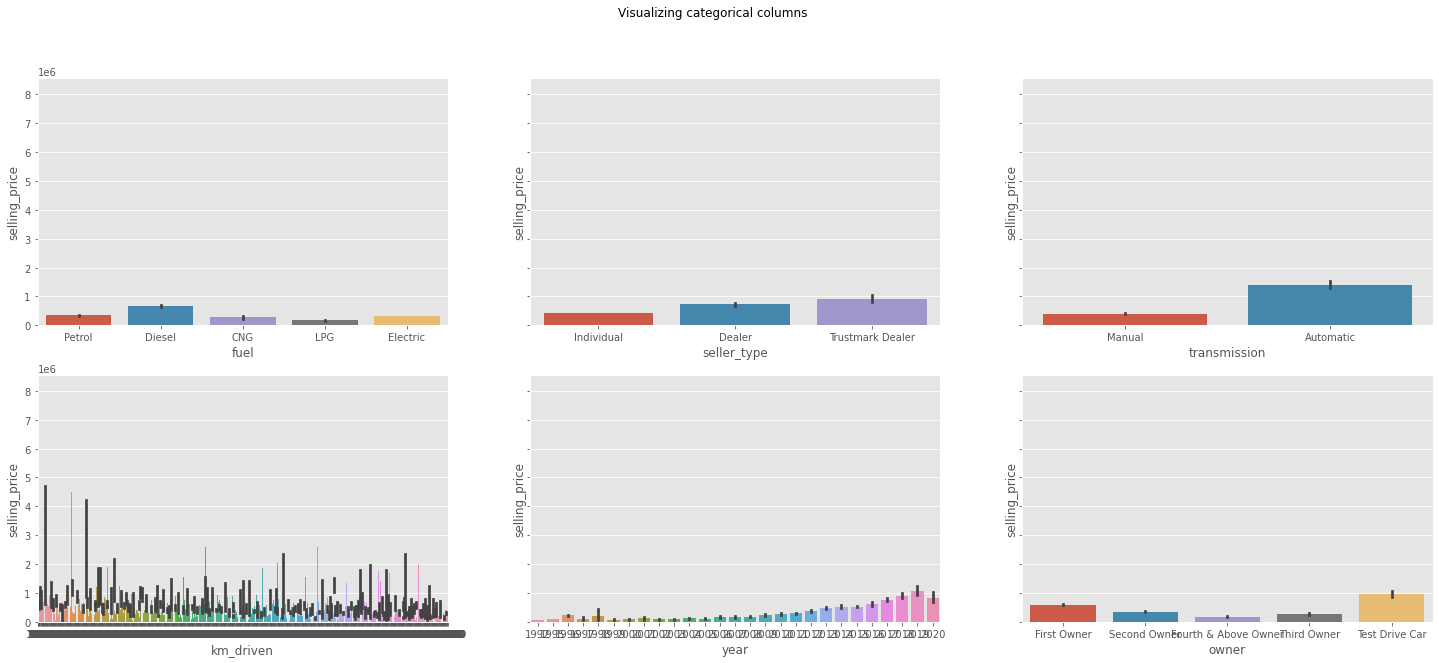

In [238]:
fig, axes = plt.subplots(2,3,figsize=(25,10), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel, y=selling_price, ax=axes[0][0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[0][1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[0][2])
sns.barplot(x=km_driven, y=selling_price, ax=axes[1][0])
sns.barplot(x=year, y=selling_price, ax=axes[1][1])
sns.barplot(x=owner, y=selling_price, ax=axes[1][2])


In [239]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='Count'>

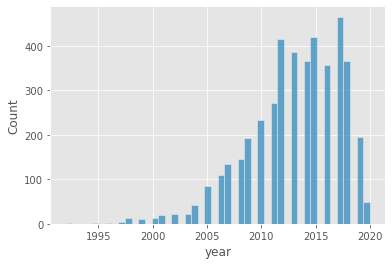

In [240]:
sns.histplot(year)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

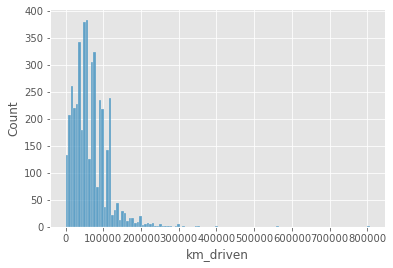

In [241]:
sns.histplot(km_driven)

<AxesSubplot:>

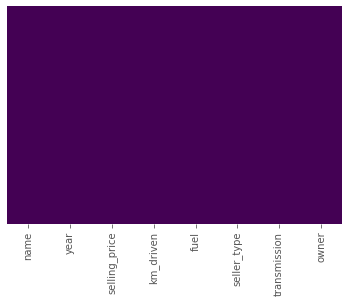

In [242]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')

In [243]:
y=dataset['selling_price']

In [244]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [245]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [246]:
X=dataset[['year','km_driven','fuel','transmission','owner']]

In [247]:
X

,year,km_driven,fuel,transmission,owner
0,2007,70000,Petrol,Manual,First Owner
1,2007,50000,Petrol,Manual,First Owner
2,2012,100000,Diesel,Manual,First Owner
3,2017,46000,Petrol,Manual,First Owner
4,2014,141000,Diesel,Manual,Second Owner
...,...,...,...,...,...
4335,2014,80000,Diesel,Manual,Second Owner
4336,2014,80000,Diesel,Manual,Second Owner
4337,2009,83000,Petrol,Manual,Second Owner
4338,2016,90000,Diesel,Manual,First Owner


In [248]:
X.dtypes

year             int64
km_driven        int64
fuel            object
transmission    object
owner           object
dtype: object

In [249]:
fuel = dataset['fuel']

In [250]:
fuel

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
4335    Diesel
4336    Diesel
4337    Petrol
4338    Diesel
4339    Petrol
Name: fuel, Length: 4340, dtype: object

In [251]:
fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [252]:
fuel = pd.get_dummies(fuel, drop_first=True )

In [253]:
fuel

,Diesel,Electric,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
4335,1,0,0,0
4336,1,0,0,0
4337,0,0,0,1
4338,1,0,0,0


In [254]:
gears = dataset['transmission']
gears=pd.get_dummies(gears, drop_first=True )
gears

,Manual
0,1
1,1
2,1
3,1
4,1
...,...
4335,1
4336,1
4337,1
4338,1


In [255]:
owners=dataset['owner']
owners=pd.get_dummies(owners, drop_first=True )
owners

,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
4335,0,1,0,0
4336,0,1,0,0
4337,0,1,0,0
4338,0,0,0,0


In [256]:
seller = dataset['seller_type']
seller =pd.get_dummies(seller, drop_first=True )
seller

,Individual,Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4335,1,0
4336,1,0
4337,1,0
4338,1,0


In [257]:
year=dataset['year']
km_driven=dataset['km_driven']
X = pd.concat([year, km_driven,fuel,gears,owners] ,  axis=1)
X

,year,km_driven,Diesel,Electric,LPG,Petrol,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,70000,0,0,0,1,1,0,0,0,0
1,2007,50000,0,0,0,1,1,0,0,0,0
2,2012,100000,1,0,0,0,1,0,0,0,0
3,2017,46000,0,0,0,1,1,0,0,0,0
4,2014,141000,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,1,0,0,0,1,0,1,0,0
4336,2014,80000,1,0,0,0,1,0,1,0,0
4337,2009,83000,0,0,0,1,1,0,1,0,0
4338,2016,90000,1,0,0,0,1,0,0,0,0


In [258]:
year.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       2007
1       2007
2       2012
3       2017
4       2014
        ... 
4335    2014
4336    2014
4337    2009
4338    2016
4339    2016
Name: year, Length: 4340, dtype: int64>

In [259]:
km_driven.mean()

66215.77741935484

In [260]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

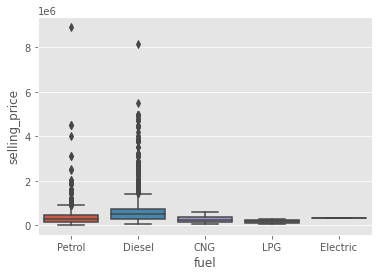

In [261]:
sns.boxplot(data=dataset, y='selling_price' , x='fuel')

In [262]:
selling_price

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [263]:
petrol_data = dataset.groupby('fuel').get_group('Petrol')
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [264]:
petrol_data = dataset.groupby('seller_type').get_group('Individual')
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [265]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [266]:
dataset.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

dataset.replace({'transmission':{'Manual':0, 'Automatic':1 }}, inplace=True)

In [267]:
owners=dataset['seller_type']
owners=pd.get_dummies(owners, drop_first=True )

In [268]:
dataset.head(100)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Individual,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Individual,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Individual,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,0,Second Owner
...,...,...,...,...,...,...,...,...
95,Fiat Avventura MULTIJET Emotion,2015,350000,53000,1,Individual,0,Second Owner
96,Audi A8 4.2 TDI,2013,2800000,49000,1,Dealer,1,First Owner
97,Datsun RediGO 1.0 S,2017,210000,15000,0,Dealer,0,Second Owner
98,Volkswagen Jetta 1.4 TSI Comfortline,2013,450000,50000,0,Individual,0,First Owner


In [269]:
type(dataset)

pandas.core.frame.DataFrame

In [270]:
type(X)

pandas.core.frame.DataFrame

In [271]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

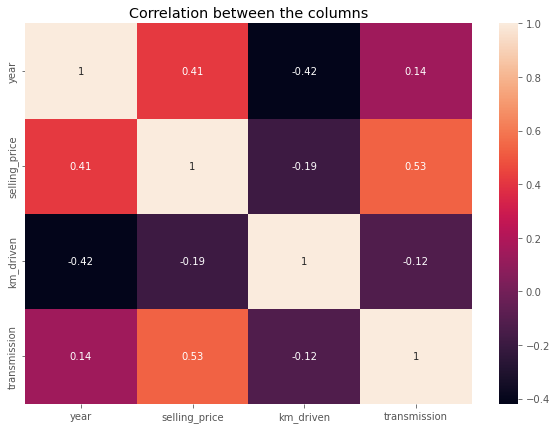

In [272]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()
#Ligher color relate a high value of corelation 

<AxesSubplot:title={'center':'Correlation between present year and selling price'}, xlabel='year', ylabel='selling_price'>

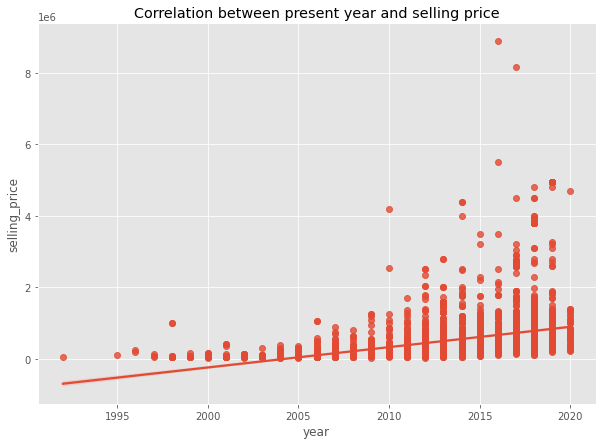

In [273]:
fig=plt.figure(figsize=(10,7))
plt.title('Correlation between present year and selling price')
sns.regplot(x='year', y='selling_price', data=dataset)

<AxesSubplot:title={'center':'Correlation between present km driven and selling price'}, xlabel='km_driven', ylabel='selling_price'>

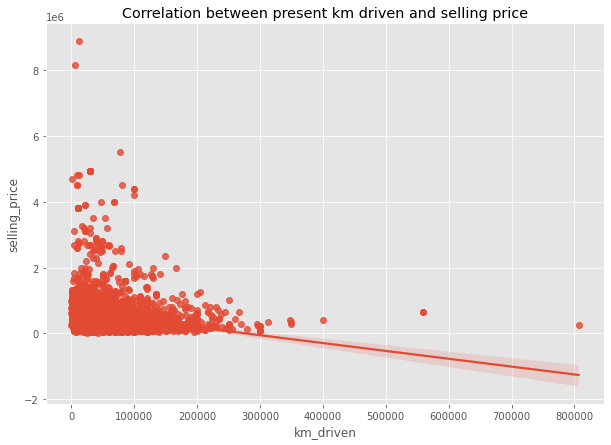

In [274]:
fig=plt.figure(figsize=(10,7))
plt.title('Correlation between present km driven and selling price')
sns.regplot(x='km_driven', y='selling_price', data=dataset)

In [275]:
X = dataset.drop(['name','seller_type','owner','seller_type'],axis=1)
y = dataset['selling_price']

In [276]:
print("shape of X is:",X.shape)
print("shape of y is:",y.shape)

shape of X is: (4340, 5)
shape of y is: (4340,)


In [277]:
X

,year,selling_price,km_driven,fuel,transmission
0,2007,60000,70000,0,0
1,2007,135000,50000,0,0
2,2012,600000,100000,1,0
3,2017,250000,46000,0,0
4,2014,450000,141000,1,0
...,...,...,...,...,...
4335,2014,409999,80000,1,0
4336,2014,409999,80000,1,0
4337,2009,110000,83000,0,0
4338,2016,865000,90000,1,0


In [278]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [279]:

gear = dataset['transmission']
gear = pd.get_dummies(gear, drop_first=True )
gear

,1
0,0
1,0
2,0
3,0
4,0
...,...
4335,0
4336,0
4337,0
4338,0


In [280]:
X.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel             object
transmission      int64
dtype: object

In [281]:
X=pd.concat([year,km_driven,fuel,gears,owners], axis=1)

In [282]:
X

,year,km_driven,Diesel,Electric,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2007,70000,0,0,0,1,1,1,0
1,2007,50000,0,0,0,1,1,1,0
2,2012,100000,1,0,0,0,1,1,0
3,2017,46000,0,0,0,1,1,1,0
4,2014,141000,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
4335,2014,80000,1,0,0,0,1,1,0
4336,2014,80000,1,0,0,0,1,1,0
4337,2009,83000,0,0,0,1,1,1,0
4338,2016,90000,1,0,0,0,1,1,0


In [283]:
X.dtypes

year                int64
km_driven           int64
Diesel              uint8
Electric            uint8
LPG                 uint8
Petrol              uint8
Manual              uint8
Individual          uint8
Trustmark Dealer    uint8
dtype: object

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [306]:
scaler=StandardScaler()

In [307]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [308]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (1302, 9)
X_train shape: (3038, 9)
y_test shape:  (1302,)
y_train shape: (3038,)


In [309]:
model = LinearRegression()

In [310]:
model.fit(X_train, y_train)

LinearRegression()

In [311]:
pred = model.predict(X_test)

In [312]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [313]:
score =model.score(X_test ,y_test)
score

0.46430950888361955

In [314]:
mse=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [294]:
np.mean(mse)

-190623431480.05557

In [295]:
X_test

array([[-0.74981388,  0.294691  ,  1.01058931, ...,  0.34491839,
         0.57506975, -0.15580474],
       [ 1.38931498, -0.8253772 , -0.98952165, ...,  0.34491839,
         0.57506975, -0.15580474],
       [-1.22517584, -0.51423071, -0.98952165, ...,  0.34491839,
         0.57506975, -0.15580474],
       ...,
       [-0.51213289,  0.71735824,  1.01058931, ...,  0.34491839,
         0.57506975, -0.15580474],
       [ 0.91395302, -1.3325779 ,  1.01058931, ...,  0.34491839,
         0.57506975, -0.15580474],
       [-0.98749486, -0.33930987, -0.98952165, ...,  0.34491839,
         0.57506975, -0.15580474]])

In [296]:
pd.Series(y_pred)

0       4.290751e+05
1       5.147670e+05
2       9.160607e+04
3       5.074477e+05
4       1.599827e+06
            ...     
1297    7.536533e+05
1298    5.910478e+05
1299    4.432632e+05
1300    7.753167e+05
1301    1.988550e+05
Length: 1302, dtype: float64

In [297]:
pd.DataFrame(y_test)

,selling_price
3978,165000
1448,250000
2664,120000
17,450000
1634,730000
...,...
3790,1490000
700,650000
1370,165000
644,1600000


In [298]:
X_train

array([[-0.27445191, -0.34302934, -0.98952165, ...,  0.34491839,
        -1.73891951, -0.15580474],
       [ 0.67627203,  0.61169143,  1.01058931, ...,  0.34491839,
         0.57506975, -0.15580474],
       [-0.51213289,  0.1256241 ,  1.01058931, ...,  0.34491839,
        -1.73891951, -0.15580474],
       ...,
       [ 0.67627203, -0.31817651,  1.01058931, ...,  0.34491839,
        -1.73891951, -0.15580474],
       [-0.03677092,  0.294691  ,  1.01058931, ...,  0.34491839,
         0.57506975, -0.15580474],
       [-0.03677092,  0.294691  , -0.98952165, ...,  0.34491839,
         0.57506975, -0.15580474]])

In [299]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])

In [300]:
coeff_df

,coefficient
year,156231.915926
km_driven,-51217.399408
Diesel,148487.057040
Electric,-11526.089680
LPG,5436.033675
Petrol,-5077.357452
Manual,-272892.703094
Individual,-29548.887845
Trustmark Dealer,24049.721777


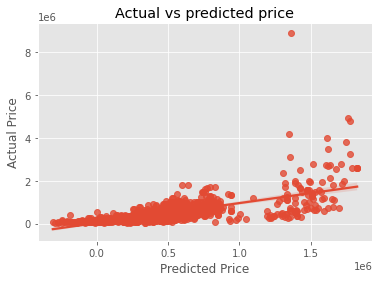

In [301]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [302]:
pred_price=sum(pred)
pred_price

644297922.5611581

In [303]:
actual_price=8.900000e+06

In [304]:
Accuracy=pred_price/(actual_price)
print("Accuracy=", Accuracy)


Accuracy= 72.3930250068717
